In [1]:
library(lme4)
library(lmerTest)

library(ggplot2)
library(repr)
library(ggeffects)

Loading required package: Matrix

Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step

Warning message in checkMatrixPackageVersion():
“Package version inconsistency detected.
TMB was built with Matrix version 1.2.18
Current Matrix version is 1.2.17
Please re-install 'TMB' from source using install.packages('TMB', type = 'source') or ask CRAN for a binary version of 'TMB' matching CRAN's 'Matrix' package”

In [2]:
d <- read.csv("hares.csv")
head(d)

Treatment,Replicate,Measurement,Hare,Rabbit,Plantspecies,Who,Day
Dune,1,1,2,3,6,Julia/Sharmi,1
Dune,1,2,0,0,5,Julia/Sharmi,1
Dune,1,3,6,2,7,Julia/Sharmi,1
Dune,1,4,0,0,5,Nguyen,1
Dune,1,5,3,2,5,Nguyen,1
Dune,2,1,0,0,7,Julia/Sharmi,1


In [3]:
d$Treatment <- factor(d$Treatment, levels=c("Agric. grassland", "Dune", "Salt Marsh"), labels=c("AG", "D", "SM"))
d$Measurement <- factor(d$Measurement)
d$Replicate <- factor(d$Replicate)
d$Day <- factor(d$Day)
str(d)

'data.frame':	60 obs. of  8 variables:
 $ Treatment   : Factor w/ 3 levels "AG","D","SM": 2 2 2 2 2 2 2 2 2 2 ...
 $ Replicate   : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 2 2 2 2 2 ...
 $ Measurement : Factor w/ 5 levels "1","2","3","4",..: 1 2 3 4 5 1 2 3 4 5 ...
 $ Hare        : int  2 0 6 0 3 0 2 0 0 0 ...
 $ Rabbit      : int  3 0 2 0 2 0 1 0 2 5 ...
 $ Plantspecies: int  6 5 7 5 5 7 5 3 4 5 ...
 $ Who         : Factor w/ 5 levels "Julia","Julia/Nguyen",..: 3 3 3 4 4 3 3 4 4 4 ...
 $ Day         : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...


In [4]:
head(d)

Treatment,Replicate,Measurement,Hare,Rabbit,Plantspecies,Who,Day
D,1,1,2,3,6,Julia/Sharmi,1
D,1,2,0,0,5,Julia/Sharmi,1
D,1,3,6,2,7,Julia/Sharmi,1
D,1,4,0,0,5,Nguyen,1
D,1,5,3,2,5,Nguyen,1
D,2,1,0,0,7,Julia/Sharmi,1


In [5]:
longer <- read.csv("hares_longer.csv")
longer$Treatment <- factor(longer$Treatment, levels=c("Agric. grassland", "Dune", "Salt Marsh"), 
                           labels=c("AG", "D", "SM"))

## Differences in hare abundance can be explained by plant variety

In [6]:
m2 <- glmer(Hare ~ Plantspecies  + (1|Replicate), family = poisson(), data = d)
summary(m2)

# Extract the prediction data frame
pred1 <- ggpredict(m2, terms = c("Plantspecies"))  # this gives overall predictions for the model
pred1

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: Hare ~ Plantspecies + (1 | Replicate)
   Data: d

     AIC      BIC   logLik deviance df.resid 
   312.3    318.6   -153.1    306.3       57 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4220 -1.1733 -0.6891  0.7818  6.4150 

Random effects:
 Groups    Name        Variance Std.Dev.
 Replicate (Intercept) 0.202    0.4494  
Number of obs: 60, groups:  Replicate, 4

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.07900    0.36849  -2.928  0.00341 ** 
Plantspecies  0.36236    0.04544   7.974 1.53e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
Plantspecis -0.760

x,predicted,std.error,conf.low,conf.high,group
1,0.4883918,0.3352749,0.2531523,0.9422255,1
2,0.7016809,0.3052210,0.3857759,1.2762749,1
3,1.0081169,0.2793571,0.5830713,1.7430110,1
4,1.4483787,0.2589419,0.8719075,2.4059903,1
5,2.0809105,0.2453392,1.2865312,3.3657857,1
6,2.9896796,0.2397115,1.8688817,4.7826377,1
7,4.2953237,0.2426147,2.6698196,6.9105064,1
8,6.1711649,0.2537559,3.7529239,10.1476282,1
9,8.8662179,0.2721252,5.2012171,15.1137355,1
10,12.7382466,0.2963818,7.1257244,22.7714288,1


Saving 6,67 x 6,67 in image


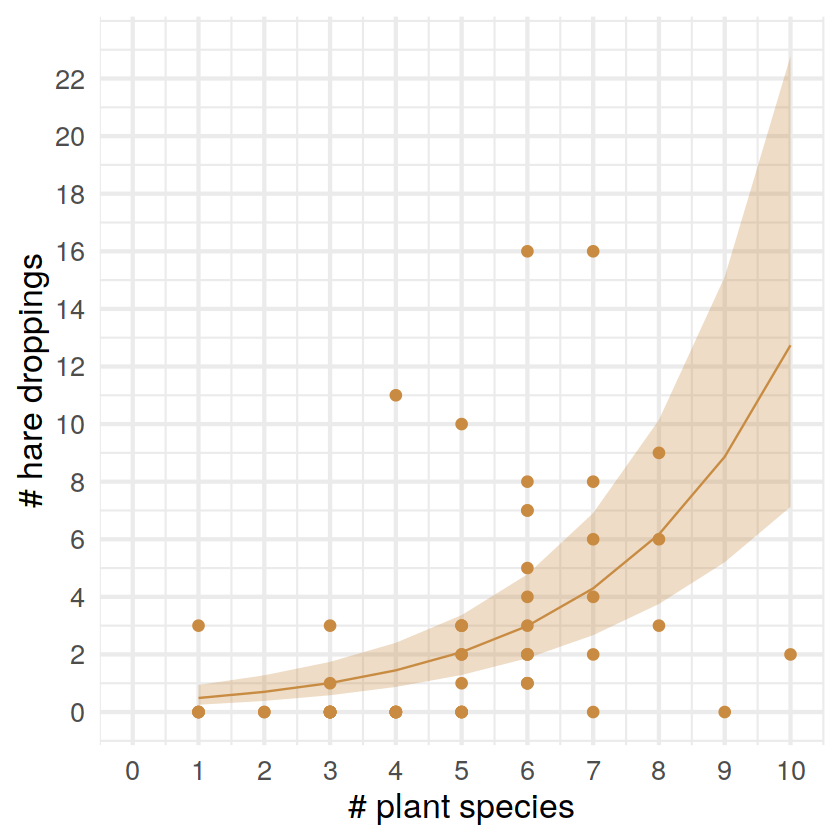

In [7]:
# Plot the predictions 
#options(repr.P.width=7,repr.P.height=7)
(ggplot(pred1) + 
   geom_line(aes(x = x, y = predicted), color = "#c98b42ff") +          # slope
   geom_ribbon(aes(x = x, ymin = conf.low, ymax = conf.high), 
               fill = "#c98b42ff", alpha = 0.3) +  # error band
   geom_point(data = d,                      # adding the raw data (scaled values)
              aes(x = Plantspecies, y = Hare), color = "#c98b42ff", size = 2.5) + 
   labs(x = "# plant species", y = "# hare droppings") + 
   theme_minimal(base_size=20) +
   scale_x_continuous(breaks = seq(0, 10, 1), limits = c(0,10)) +
   scale_y_continuous(breaks = seq(0, 23, 2), limits = c(0,23))
)

ggsave("fig/plant_hare.svg")

## If in the same habitat, does variation in hare abundance associates with variation in plant variety? - Just in Dune, but not in Salt Marsh
Analysis was not done for Agri. grassland habitat, because there's almost stable plant variety in this environment

## Rabbit abundance also associates with plant variety in Dune, but not in Salt Marsh.

## In Dune, more rabbit is correlated with less plant species, while hare abundance follows the opposite correlation

In [8]:
# Dune
dune <- d[d$Treatment=='D',]

m4a <- glmer(Hare ~ Plantspecies  + (1|Replicate), family = poisson(), data = dune)
summary(m4a)

m6a <- glmer(Rabbit ~ Plantspecies  + (1|Replicate), family = poisson(), data = dune)
summary(m6a)

# Extract the prediction data frame
pred_hare <- ggpredict(m4a, terms = c("Plantspecies"))
pred_hare$group <- "Hare"

pred_rabbit <- ggpredict(m6a, terms = c("Plantspecies"))
pred_rabbit$group <- "Rabbit"

pred2 <- rbind(pred_hare, pred_rabbit)
pred2

boundary (singular) fit: see ?isSingular
Warning message in printCoefmat(x$coefficients, digits = digits, signif.stars = signif.stars):
“NAs introduced by coercion”

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: Hare ~ Plantspecies + (1 | Replicate)
   Data: dune

     AIC      BIC   logLik deviance df.resid 
    75,8     78,8    -34,9     69,8       17 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1,7953 -0,9073 -0,4801  0,6367  3,4868 

Random effects:
 Groups    Name        Variance  Std.Dev. 
 Replicate (Intercept) 1,552e-15 3,939e-08
Number of obs: 20, groups:  Replicate, 4

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -2,0625     0,8660  -2,382 0,017235 *  
Plantspecies   0,4618     0,1386   3,332 0,000861 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
Plantspecis -0,982
convergence code: 0
boundary (singular) fit: see ?isSingular


Warning message in printCoefmat(x$coefficients, digits = digits, signif.stars = signif.stars):
“NAs introduced by coercion”

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: Rabbit ~ Plantspecies + (1 | Replicate)
   Data: dune

     AIC      BIC   logLik deviance df.resid 
   111,0    114,0    -52,5    105,0       17 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1,9186 -1,3988 -0,1341  0,6775  4,8571 

Random effects:
 Groups    Name        Variance Std.Dev.
 Replicate (Intercept) 0,1815   0,426   
Number of obs: 20, groups:  Replicate, 4

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)    2,1479     0,6244   3,440 0,000581 ***
Plantspecies  -0,2360     0,1116  -2,115 0,034415 *  
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
Plantspecis -0,910

x,predicted,std.error,conf.low,conf.high,group
3,"0,5081292","0,4645592","0,2044281","1,263013",Hare
4,"0,8063994","0,3385093","0,4153465","1,565632",Hare
5,"1,2797531","0,2275435","0,8192960","1,998994",Hare
6,"2,0309638","0,1654623","1,4684542","2,808950",Hare
7,"3,2231326","0,2034546","2,1632030","4,802408",Hare
8,"5,1151005","0,3063071","2,8062418","9,323592",Hare
3,"4,2204266","0,3488254","2,1302750","8,361362",Rabbit
4,"3,3332158","0,2865083","1,9010221","5,844397",Rabbit
5,"2,6325129","0,2596005","1,5826982","4,378677",Rabbit
6,"2,0791106","0,2785597","1,2043899","3,589121",Rabbit


Saving 6,67 x 6,67 in image


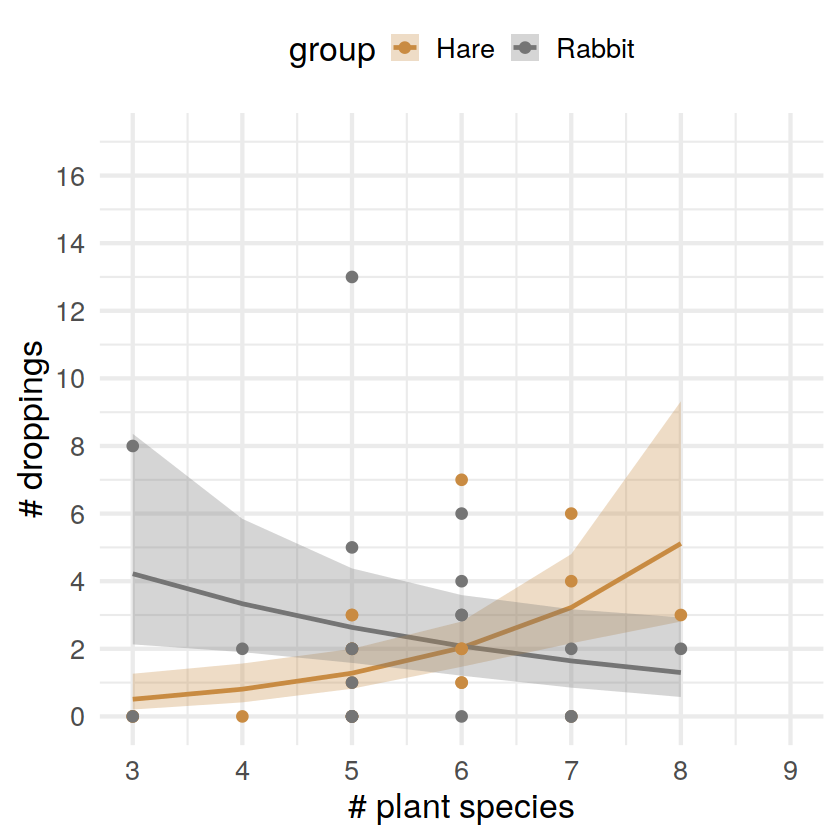

In [9]:
# Plot the predictions 

# define colors
cols <- c(Hare = "#c98b42ff", Rabbit = "#757575")

#options(repr.P.width=7,repr.P.height=7)
(ggplot(pred2) + 
   geom_line(aes(x = x, y = predicted, colour = group), size = 1) +          # slope
   geom_ribbon(aes(x = x, ymin = conf.low, ymax = conf.high, fill = group), 
               alpha = 0.3, colour = NA) +  # error band
   geom_point(data = longer[longer$Treatment=="D",],                      # adding the raw data (scaled values)
              aes(x = Plantspecies, y = Droppings, colour = Herbivore), size = 2.5) + 
   labs(x = "# plant species", y = "# droppings") + 
   scale_color_manual(values = cols) + scale_fill_manual(values = cols) +
   theme_minimal(base_size=20) + theme(legend.position = "top") +
   scale_x_continuous(breaks = seq(3, 9, 1), limits = c(3,9)) +
   scale_y_continuous(breaks = seq(0, 17, 2), limits = c(0,17))
)

ggsave("fig/plant_rabbit-hare_dune.svg")

In [10]:
# Salt Marsh
sm <- d[d$Treatment=='SM',]

m4b <- glmer(Hare ~ Plantspecies  + (1|Replicate), family = poisson(), data = sm)
summary(m4b)

m6b <- glmer(Rabbit ~ Plantspecies  + (1|Replicate), family = poisson(), data = sm)
summary(m6b)

# Extract the prediction data frame
pred_hare <- ggpredict(m4b, terms = c("Plantspecies"))
pred_hare$group <- "Hare"

pred_rabbit <- ggpredict(m6b, terms = c("Plantspecies"))
pred_rabbit$group <- "Rabbit"

pred3 <- rbind(pred_hare, pred_rabbit)
pred3

Warning message in printCoefmat(x$coefficients, digits = digits, signif.stars = signif.stars):
“NAs introduced by coercion”

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: Hare ~ Plantspecies + (1 | Replicate)
   Data: sm

     AIC      BIC   logLik deviance df.resid 
   132,2    135,2    -63,1    126,2       17 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2,46069 -1,28697 -0,09819  0,90502  2,86634 

Random effects:
 Groups    Name        Variance Std.Dev.
 Replicate (Intercept) 0,2514   0,5014  
Number of obs: 20, groups:  Replicate, 4

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)   1,24118    0,52511   2,364   0,0181 *
Plantspecies  0,06535    0,07006   0,933   0,3509  
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
Plantspecis -0,856

boundary (singular) fit: see ?isSingular
Warning message in printCoefmat(x$coefficients, digits = digits, signif.stars = signif.stars):
“NAs introduced by coercion”

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: Rabbit ~ Plantspecies + (1 | Replicate)
   Data: sm

     AIC      BIC   logLik deviance df.resid 
    50,8     53,8    -22,4     44,8       17 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1,1810 -0,7859 -0,4089  0,6472  1,9303 

Random effects:
 Groups    Name        Variance Std.Dev.
 Replicate (Intercept) 0        0       
Number of obs: 20, groups:  Replicate, 4

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)    1,5239     0,9287   1,641   0,1008  
Plantspecies  -0,2978     0,1626  -1,831   0,0671 .
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
Plantspecis -0,963
convergence code: 0
boundary (singular) fit: see ?isSingular


x,predicted,std.error,conf.low,conf.high,group
3,"4,2090864","0,3617600","2,07136758","8,553001",Hare
4,"4,4933593","0,3197111","2,40122320","8,408330",Hare
5,"4,7968314","0,2887525","2,72375388","8,447750",Hare
6,"5,1207994","0,2726879","3,00071930","8,738767",Hare
7,"5,4666475","0,2741483","3,19422587","9,355705",Hare
8,"5,8358534","0,2928715","3,28709051","10,360891",Hare
9,"6,2299948","0,3258958","3,28915739","11,800236",Hare
10,"6,6507556","0,3694054","3,22427876","13,718587",Hare
3,"1,8787180","0,4772688","0,73724128","4,787552",Rabbit
4,"1,3948781","0,3492890","0,70343006","2,765996",Rabbit


Saving 6,67 x 6,67 in image


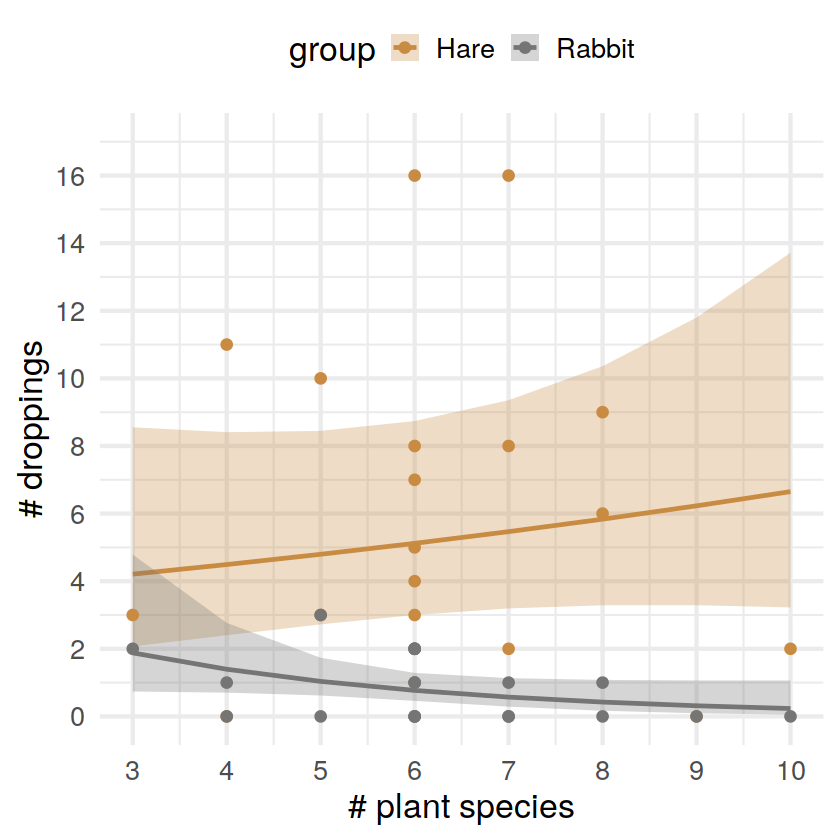

In [11]:
# Plot the predictions 

# define colors
cols <- c(Hare = "#c98b42ff", Rabbit = "#757575")

#options(repr.P.width=7,repr.P.height=7)
(ggplot(pred3) + 
   geom_line(aes(x = x, y = predicted, colour = group), size = 1) +          # slope
   geom_ribbon(aes(x = x, ymin = conf.low, ymax = conf.high, fill = group), 
               alpha = 0.3, colour = NA) +  # error band
   geom_point(data = longer[longer$Treatment=="SM",],                      # adding the raw data (scaled values)
              aes(x = Plantspecies, y = Droppings, colour = Herbivore), size = 2.5) + 
   labs(x = "# plant species", y = "# droppings") + 
   scale_color_manual(values = cols) + scale_fill_manual(values = cols) +
   theme_minimal(base_size=20) + theme(legend.position = "top")+
   scale_x_continuous(breaks = seq(3, 10, 1), limits = c(3,10)) +
   scale_y_continuous(breaks = seq(0, 17, 2), limits = c(0,17))
)

ggsave("fig/plant_rabbit-hare_sm.svg")